In [23]:
!pip install spacy

In [1]:
#구글드라이브 연동
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1

In [52]:
# https://programmerbackpack.com/python-nlp-tutorial-information-extraction-and-knowledge-graphs/ 
# https://github.com/bdmarius/python-knowledge-graph/blob/master/knowledgegraph.py 

!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 13.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [125]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(20,20))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()    

In [123]:
candidate_sentences["review"].loc[1]

'Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean irrational and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I039m not.. Bipolar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.'

In [117]:
candidate_sentences["rating"].loc[1]

10

Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean irrational and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I039m not.. Bipolar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.
Abilify -> nsubj
changed -> ROOT
my -> poss
life -> dobj
. -> punct
Abilify , change , life
There -> expl
is -> ROOT
hope -> attr
. -> punct
 , be hope , 
I -> nsubj
was -> ROOT
on -> prep
Zoloft -> pobj
and -> cc
Clonidine -> conj
when -> advmod
I -> nsubj
first -> advmod


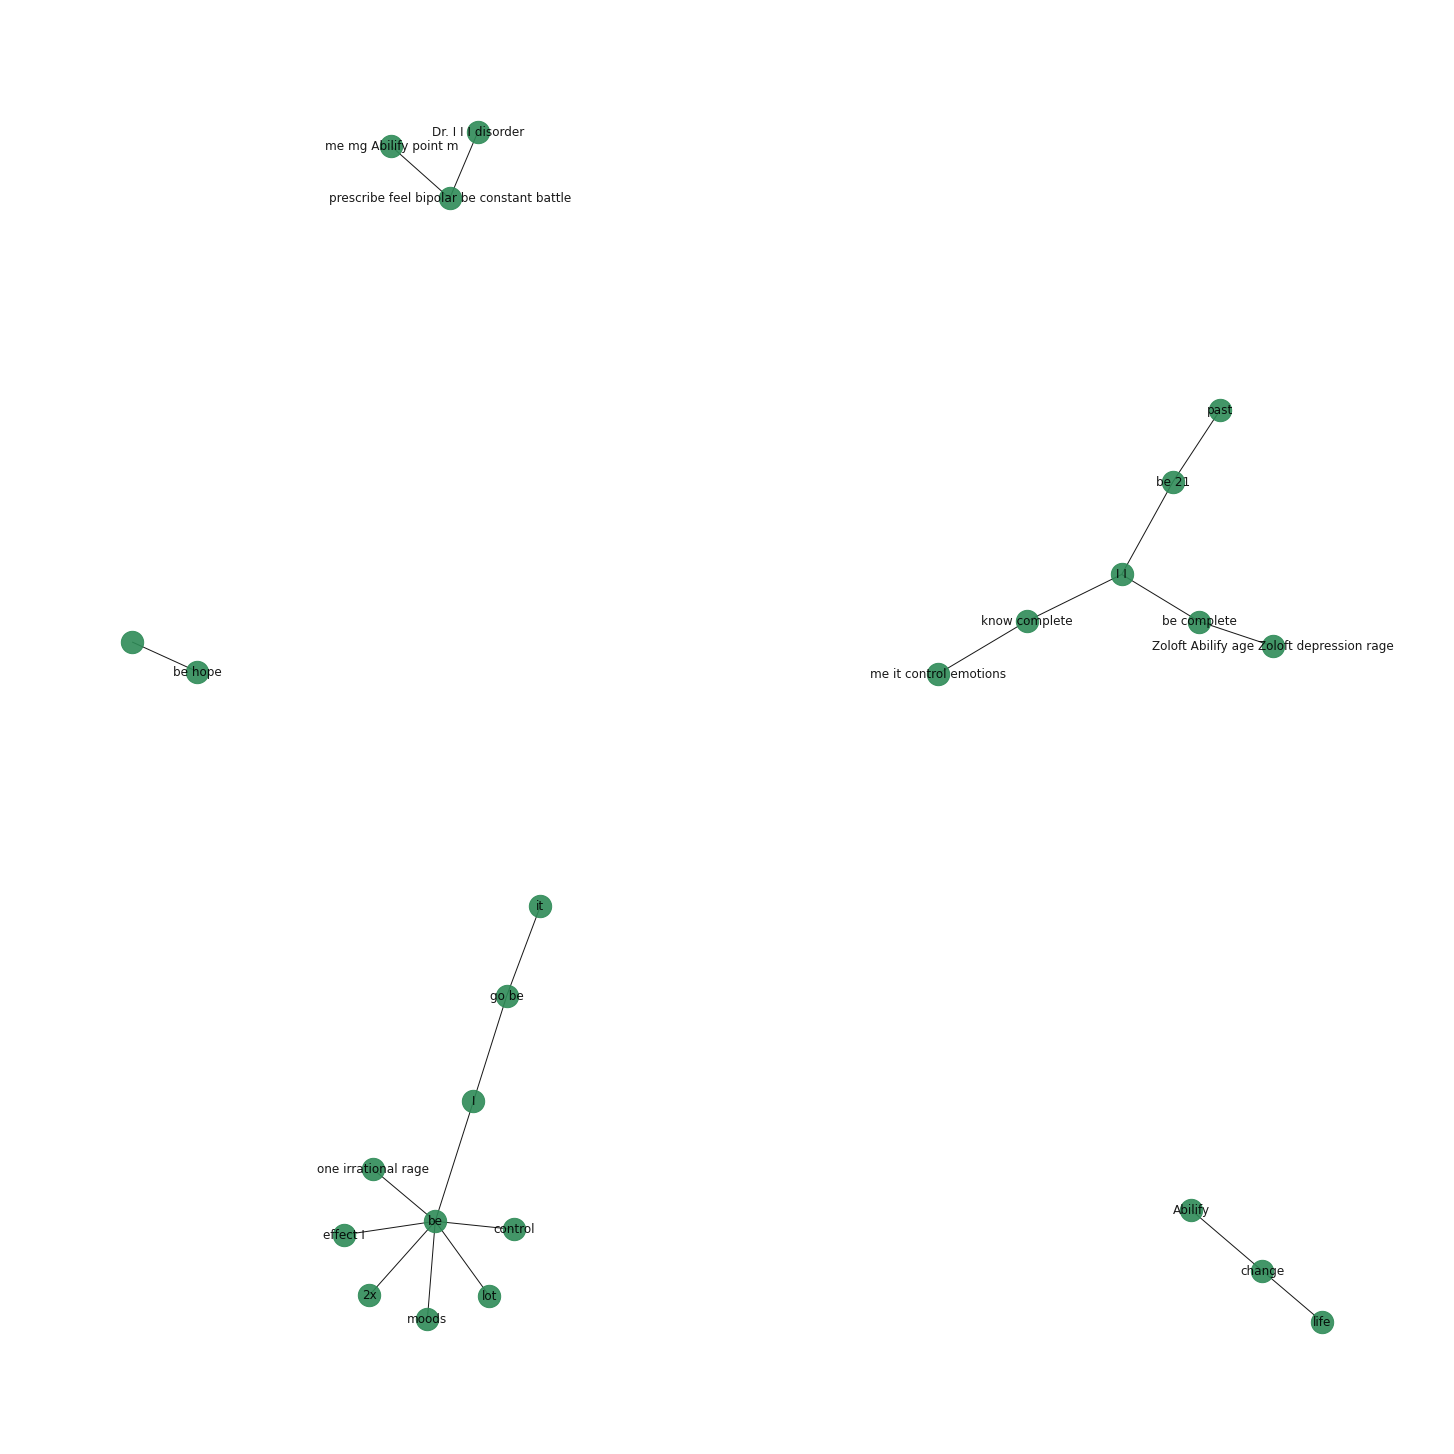

In [126]:
text = candidate_sentences["review"].loc[1]

sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')

triples = []
print (text)
for sentence in sentences:
  triples.append(processSentence(sentence))

printGraph(triples)

In [82]:
# Tags I've chosen for relations
deps = ["ROOT", "adj", "attr", "agent", "amod"]

# Tags I've chosen for entities(subjects and objects)
deps = ["compound", "prep", "conj", "mod"]

##2

In [ ]:
# https://ichi.pro/ko/spacy-3gwa-hamkke-bert-transformerleul-sayonghayeo-jointeu-entiti-mich-gwangye-chuchul-bunlyugileul-hunlyeonhaneun-bangb-81273814588252 

!pip install -U spacy-nightly --pre

     |████████████████████████████████| 12.7 MB 165 kB/s 
     |████████████████████████████████| 9.1 MB 35.8 MB/s 
     |████████████████████████████████| 456 kB 46.0 MB/s 
     |████████████████████████████████| 623 kB 49.2 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 2.2.4 requires catalogue<1.1.0,>=0.0.7, but you have catalogue 2.0.6 wh

In [ ]:
!pip install -U pip setuptools wheel
!python -m spacy project clone tutorials/content/drive/MyDrive/버트연구보조원/rel_component


✘ Can't clone project, directory already exists:
/content/rel_component



In [ ]:
!python -m spacy download en_core_web_trf
!pip install -U spacy transformers

     |████████████████████████████████| 459.7 MB 1.2 MB/s 
     |████████████████████████████████| 6.3 MB 4.6 MB/s 
     |████████████████████████████████| 42 kB 25.3 MB/s 
     |████████████████████████████████| 998 kB 53.1 MB/s 
     |████████████████████████████████| 42 kB 20.2 MB/s 
     |████████████████████████████████| 40 kB 44.7 MB/s 
     |████████████████████████████████| 2.6 MB 24.7 MB/s 
     |████████████████████████████████| 3.3 MB 24.1 MB/s 
     |████████████████████████████████| 895 kB 50.9 MB/s 
     |████████████████████████████████| 636 kB 55.8 MB/s 
  Created wheel for en-core-web-trf: filename=en_core_web_trf-3.0.0-py3-none-any.whl size=459708989 sha256=362279577de6d797bfc221e16c163e354ee1cdf17e711fbcbbdf666362d06419
  Stored in directory: /tmp/pip-ephem-wheel-cache-1zx3z9dv/wheels/be/d9/92/c65214265163256ecc7588e6468c43feb86424a69bfe2fddb9
Successfully built en-core-web-trf
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalli

In [ ]:
train_file: "data/relations_training.spacy"
dev_file: "data/relations_dev.spacy"
test_file: "data/relations_test.spacy"

In [ ]:
[components.transformer.model]
!@architectures = "spacy-transformers.TransformerModel.v1"
name = "roberta-base" # Transformer model from huggingface
tokenizer_config = {"use_fast": true}

NameError: ignored

In [ ]:
[components.relation_extractor.model.create_instance_tensor.get_instances]
@misc = "rel_instance_generator.v1"
max_length = 20

In [ ]:
!spacy project run train_gpu # command to train train transformers
!spacy project run evaluate # command to evaluate on test dataset

In [ ]:
!spacy project run train_cpu # command to train train tok2vec
!spacy project run evaluate

In [ ]:
# Transformer model
"performance":{
"rel_micro_p":0.8476190476,
"rel_micro_r":0.9468085106,
"rel_micro_f":0.8944723618,
}
# Tok2vec model
  "performance":{
"rel_micro_p":0.8604651163,
"rel_micro_r":0.7872340426,
"rel_micro_f":0.8222222222,
}

In [ ]:
import spacy
nlp = spacy.load("NER Model Repo/model-best")
Text=['''2+ years of non-internship professional software development experience
Programming experience with at least one modern language such as Java, C++, or C# including object-oriented design.
1+ years of experience contributing to the architecture and design (architecture, design patterns, reliability and scaling) of new and current systems.
Bachelor / MS Degree in Computer Science. Preferably a PhD in data science.
8+ years of professional experience in software development. 2+ years of experience in project management.
Experience in mentoring junior software engineers to improve their skills, and make them more effective, product software engineers.
Experience in data structures, algorithm design, complexity analysis, object-oriented design.
3+ years experience in at least one modern programming language such as Java, Scala, Python, C++, C#
Experience in professional software engineering practices & best practices for the full software development life cycle, including coding standards, code reviews, source control management, build processes, testing, and operations
Experience in communicating with users, other technical teams, and management to collect requirements, describe software product features, and technical designs.
Experience with building complex software systems that have been successfully delivered to customers
Proven ability to take a project from scoping requirements through actual launch of the project, with experience in the subsequent operation of the system in production''']
for doc in nlp.pipe(text, disable=["tagger"]):
print(f"spans: {[(e.start, e.text, e.label_) for e in doc.ents]}")

In [ ]:
import random
import typer
from pathlib import Path
import spacy
from spacy.tokens import DocBin, Doc
from spacy.training.example import Example
from rel_pipe import make_relation_extractor, score_relations
from rel_model import create_relation_model, create_classification_layer, create_instances, create_tensors
# We load the relation extraction (REL) model
nlp2 = spacy.load("training/model-best")
# We take the entities generated from the NER pipeline and input them to the REL pipeline
for name, proc in nlp2.pipeline:
          doc = proc(doc)
# Here, we split the paragraph into sentences and apply the relation extraction for each pair of entities found in each sentence.
for value, rel_dict in doc._.rel.items():
        for sent in doc.sents:
          for e in sent.ents:
            for b in sent.ents:
              if e.start == value[0] and b.start == value[1]:
                if rel_dict['EXPERIENCE_IN'] >=0.9 :
                  print(f" entities: {e.text, b.text} --> predicted relation: {rel_dict}")

##3

In [2]:
# https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/ 
# https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/ 

!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.2.4) ======================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.2.5   ✔
link      en               en_core_web_sm   2.2.5   ✔



In [ ]:
!pip install nltk

!pip install spacy==2.3.1

!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

!pip install pyresparser

     |████████████████████████████████| 13.7 MB 235 kB/s 
     |████████████████████████████████| 6.3 MB 4.5 MB/s 
  Using cached thinc-8.0.10-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (623 kB)
  Using cached srsly-2.4.1-cp37-cp37m-manylinux2014_x86_64.whl (456 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Created wheel for en-core-web-sm: filename=en_core_web_sm-3.0.0-py3-none-any.whl size=13704318 sha256=b639a56d1f7c0c991ee855833d930205ed2f9b911a004179bf8767bc899ed5b2
  Stored in directory: /root/.cache/pip/wheels/2d/86/ba/c33ceff8af5cb8a963e86131912039d39b37227f9787661bca
Successfully built en-core-web-sm
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found 

In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [25]:
doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

The ... det
22-year ... npadvmod
- ... punct
old ... nsubj
recently ... advmod
won ... ROOT
ATP ... compound
Challenger ... compound
tournament ... dobj
. ... punct


In [26]:
doc = nlp("Nagal won the first set.")

for tok in doc:
  print(tok.text, "...", tok.dep_)

Nagal ... nsubj
won ... ROOT
the ... det
first ... amod
set ... dobj
. ... punct


In [27]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [84]:
# import wikipedia sentences
candidate_sentences = pd.read_csv("/content/drive/MyDrive/버트연구보조원/data1/drugsComTrain_raw.csv", engine='python')
candidate_sentences.shape

(72608, 4)

In [85]:
candidate_sentences["review"] = candidate_sentences.review.str.replace('"', '')
candidate_sentences["review"] = candidate_sentences.review.str.replace('\n', '')

In [86]:
import re

for i in range(len(candidate_sentences["review"])):
  candidate_sentences["review"].loc[i] = re.sub('[^a-zA-Z0-9\s\.]','',candidate_sentences["review"].loc[i])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [87]:
candidate_sentences["review"].loc[:9]

0                                                                      He pulled out but he cummed a bit in me. I took the Plan B 26 hours later and took a pregnancy test two weeks later   I039m pregnant.
1    Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were o...
2                        I Ve had  nothing but problems with the Keppera  constant shaking in my arms amp legs amp pins amp needles feeling in my arms amp legs severe light headedness no appetite amp etc.
3    I have taken antidepressants for years with some improvement but mostly moderate to severe side affects which makes me go off them.\r\rI only take Cymbalta now mostly for pain.\r\rWhen I began Dep...
4    I039ve been on every medicine under the sun it seems to manage the hypomania  mania of Bipolar2. Within a few days of starting Lamictal was on Tegretol it was as if someone ha

In [88]:
candidate_sentences.shape

(72608, 4)

In [89]:
candidate_sentences.head()

,uniqueID,review,rating,label
0,165907,He pulled out but he cummed a bit in me. I took the Plan B 26 hours later and took a pregnancy test two weeks later I039m pregnant.,1,0
1,102654,Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were o...,10,1
2,74811,I Ve had nothing but problems with the Keppera constant shaking in my arms amp legs amp pins amp needles feeling in my arms amp legs severe light headedness no appetite amp etc.,1,0
3,75612,I have taken antidepressants for years with some improvement but mostly moderate to severe side affects which makes me go off them.\r\rI only take Cymbalta now mostly for pain.\r\rWhen I began Dep...,10,1
4,212077,I039ve been on every medicine under the sun it seems to manage the hypomania mania of Bipolar2. Within a few days of starting Lamictal was on Tegretol it was as if someone had turned a light on i...,10,1


In [90]:
candidate_sentences['review'].sample(5)

7843                                      A few hours after taking this and the swelling on my feet due to gout has subsided. Colchicine Celecoxib and Etoricoxib does not work for me this worked like a charm.
60253    I rated Lyrica as quotonequot because IF your prescription plan does not pay for it it is worth nothing to you UNLESS you are prepared to pay about 350.00 a month out of your own pocket.  It039s e...
65905    NEVER AGAIN Please NO ONE  take Dulcolax. I like a few others in this forum have been on an eating plan for weight loss. Without much fibre I039ve been suffering from constipation. I finally had e...
15622    I have had on and off insomnia since I was a teenager. For almost 10 years I took an OTC sleeping pill and it worked fine. Last winter I suddenly could not fall asleep with anything I took. I trie...
28308    I was just like you girls reading these reviews terrified that plan B had failed. THIS DRUG WORKS Had sex with my boyfriend June 18th at around midnight1am

In [28]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
  print(tok.text, "...", tok.dep_)

the ... det
drawdown ... amod
process ... nsubjpass
is ... auxpass
governed ... ROOT
by ... agent
astm ... compound
standard ... amod
d823 ... pobj


In [29]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [30]:
get_entities("the film had 200 patents")

['film', '200  patents']

In [91]:
entity_pairs = []

for i in tqdm(candidate_sentences["review"].loc[:9]):
  #print('\n',i)
  entity_pairs.append(get_entities(i))

100%|██████████| 10/10 [00:00<00:00, 23.73it/s]


In [92]:
entity_pairs

[['bit  I', 'later pregnancy test'],
 ['I', 'lot'],
 ['severe  light', 'appetite'],
 ['major  I', 'Best side effects'],
 ['hypo  I', '20  anxiety'],
 ['time  I', 'remission'],
 ['I', 'that'],
 ['medical  you', 'medical  help'],
 ['tomorrow  It039s', 'sleepless  me'],
 ['life', '10  mins']]

In [93]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", [pattern]) 
  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [94]:
get_relation("John completed the task")

'completed'

In [95]:
relations = [get_relation(i) for i in tqdm(candidate_sentences["review"].loc[:9])]

100%|██████████| 10/10 [00:00<00:00, 23.11it/s]


In [96]:
pd.Series(relations).value_counts()[:50]

is             2
thing          1
going          1
etc            1
took           1
take           1
Nope           1
yeah           1
transformed    1
dtype: int64

In [97]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [98]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

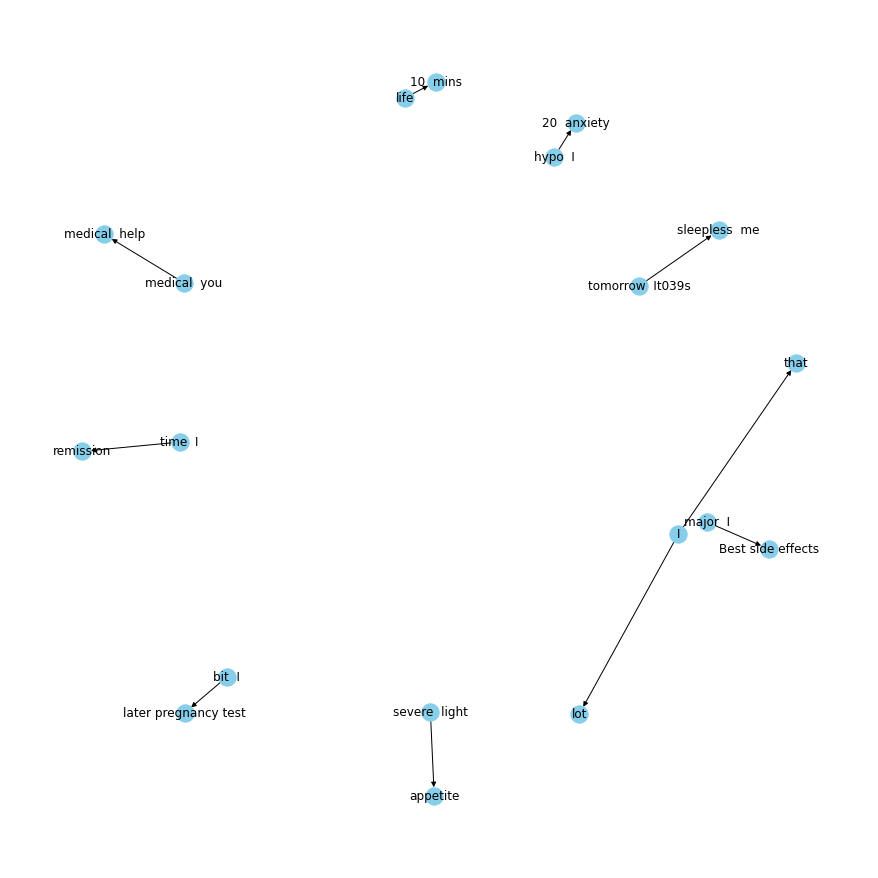

In [99]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [100]:
kg_df['edge']

0           took
1             is
2            etc
3          thing
4           take
5           Nope
6           yeah
7             is
8          going
9    transformed
Name: edge, dtype: object

In [101]:
kg_df

,source,target,edge
0,bit I,later pregnancy test,took
1,I,lot,is
2,severe light,appetite,etc
3,major I,Best side effects,thing
4,hypo I,20 anxiety,take
5,time I,remission,Nope
6,I,that,yeah
7,medical you,medical help,is
8,tomorrow It039s,sleepless me,going
9,life,10 mins,transformed


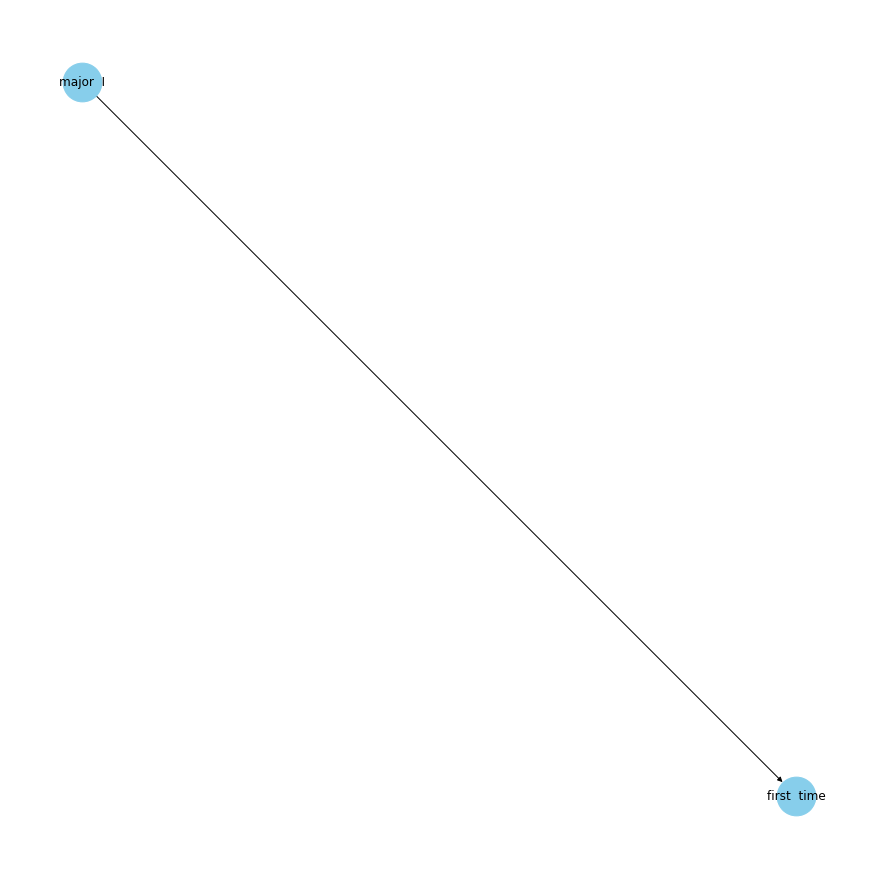

In [49]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="effects"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

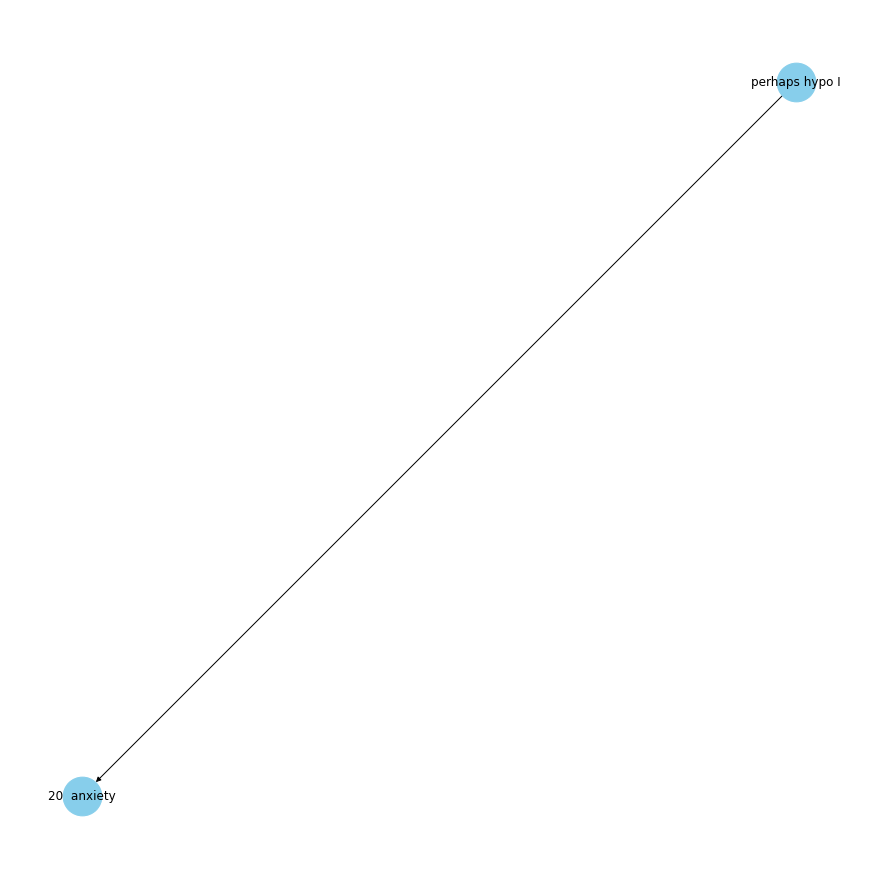

In [50]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="take"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

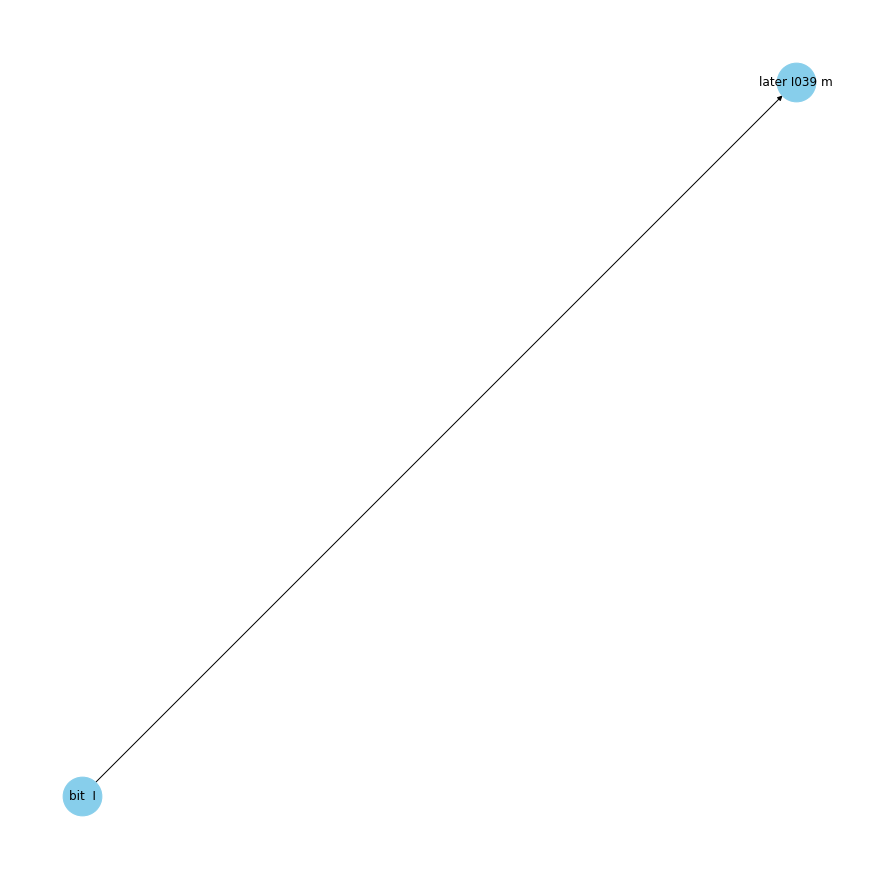

In [51]:
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="pregnant"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [75]:
entity_pairs = []

entity_pairs.append(get_entities(candidate_sentences["review"].loc[1]))

In [76]:
entity_pairs

[['Only side I', 'lot']]

In [77]:
relations = get_relation(candidate_sentences["review"].loc[1])

pd.Series(relations).value_counts()[:50]

is    1
dtype: int64

In [78]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [79]:
# create a directed-graph from a dataframe
G=nx.from_pandas_edgelist(kg_df, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

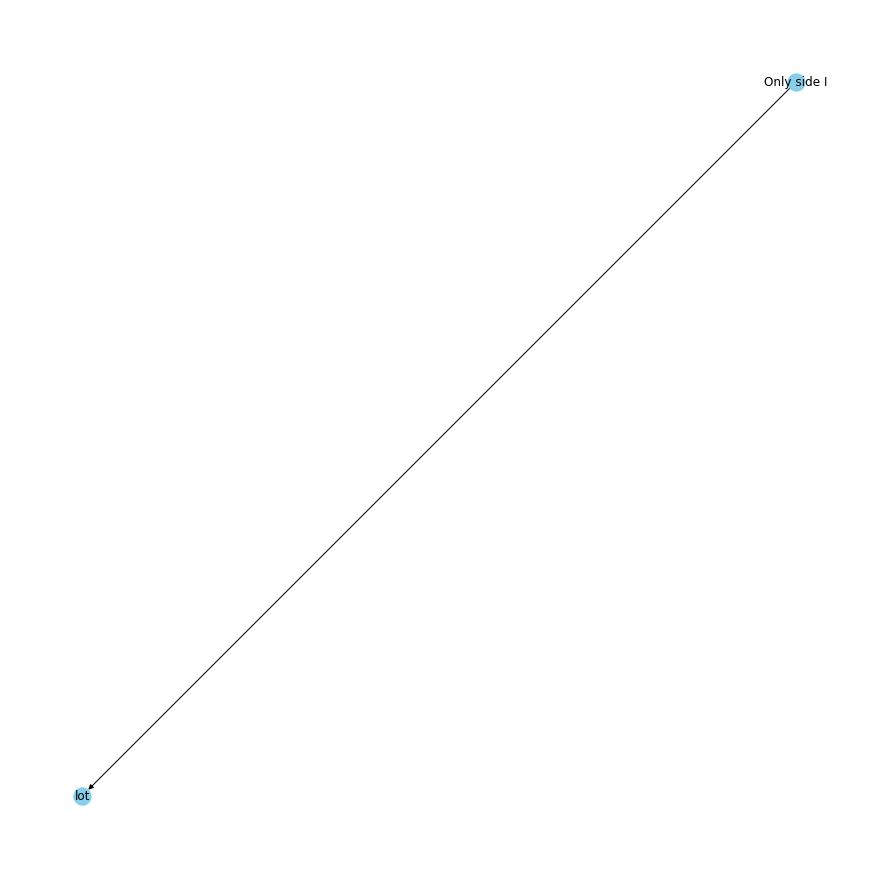

In [80]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [81]:
candidate_sentences["review"].loc[1]

'Abilify changed my life There is hope I was on Zoloft and Clonidine when I first started Abilify at the age of 15 Zoloft for depression and Clondine to manage my complete rage My moods were out of control I was depressed and hopeless one second and then mean irrational and full of rage the next My Dr prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I039m not Bipolar disorder is a constant battle I know Abilify works for me because I have tried to get off it and lost complete control over my emotions Went back on it and I was golden again  I am on 5mg 2x daily I am now 21 and better than I have ever been in the past Only side effect is I like to eat a lot'

##안해본거

In [ ]:
# https://www.affde.com/ko/natural-language-processing-python-seo.html 
# https://zephyrnet.com/ko/bert%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC-%EA%B5%AC%EC%A7%81%EC%9D%84%EC%9C%84%ED%95%9C-%EC%A7%80%EC%8B%9D-%EA%B7%B8%EB%9E%98%ED%94%84-%EA%B5%AC%EC%B6%95/ 

